In [30]:
from prophet import Prophet
import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly, plot_components_plotly

In [31]:
#reading and importing the data
data = pd.read_csv('E:/Data Science Case Studies/Data-Science-Case-Studies/crypto_dodgecoin_forcasting/DOGE-USD.csv')

#dropping unwanted columns
data.drop(['Open','High','Low','Volume','Adj Close'],axis=1,inplace=True)

#displaying the data
data.head()



,Date,Close
0,2022-05-01,0.132773
1,2022-05-02,0.130938
2,2022-05-03,0.129520
3,2022-05-04,0.135809
4,2022-05-05,0.128430


In [32]:
#checking for datatypes
data.dtypes

Date      object
Close    float64
dtype: object

In [33]:
#converting date column to date datatype
data['Date']=pd.to_datetime(data['Date'])
data.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [34]:
#creating other dataframe and formatting columns according the prophet library

df = pd.DataFrame()
df['ds']= data['Date']
df['y']=data['Close']
df

,ds,y
0,2022-05-01,0.132773
1,2022-05-02,0.130938
2,2022-05-03,0.129520
3,2022-05-04,0.135809
4,2022-05-05,0.128430
...,...,...
361,2023-04-27,0.080190
362,2023-04-28,0.080364
363,2023-04-29,0.081630
364,2023-04-30,0.079769


In [35]:
#training the model
m = Prophet()
model = m.fit(df)


15:55:57 - cmdstanpy - INFO - Chain [1] start processing
15:55:57 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
#making future predictions
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-05-01,0.100337,0.085460,0.117400,0.100337,0.100337,0.000806,0.000806,0.000806,0.000806,0.000806,0.000806,0.0,0.0,0.0,0.101143
1,2022-05-02,0.099800,0.083575,0.115146,0.099800,0.099800,0.000106,0.000106,0.000106,0.000106,0.000106,0.000106,0.0,0.0,0.0,0.099906
2,2022-05-03,0.099264,0.085253,0.114981,0.099264,0.099264,0.000718,0.000718,0.000718,0.000718,0.000718,0.000718,0.0,0.0,0.0,0.099982
3,2022-05-04,0.098727,0.082118,0.114159,0.098727,0.098727,-0.000363,-0.000363,-0.000363,-0.000363,-0.000363,-0.000363,0.0,0.0,0.0,0.098364
4,2022-05-05,0.098190,0.080746,0.113244,0.098190,0.098190,-0.000870,-0.000870,-0.000870,-0.000870,-0.000870,-0.000870,0.0,0.0,0.0,0.097320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,2023-08-05,0.078417,0.058505,0.097611,0.069025,0.087530,0.000344,0.000344,0.000344,0.000344,0.000344,0.000344,0.0,0.0,0.0,0.078761
462,2023-08-06,0.078394,0.061619,0.098329,0.068805,0.087645,0.000806,0.000806,0.000806,0.000806,0.000806,0.000806,0.0,0.0,0.0,0.079200
463,2023-08-07,0.078371,0.060014,0.096196,0.068633,0.087714,0.000106,0.000106,0.000106,0.000106,0.000106,0.000106,0.0,0.0,0.0,0.078477
464,2023-08-08,0.078347,0.060000,0.096821,0.068483,0.087843,0.000718,0.000718,0.000718,0.000718,0.000718,0.000718,0.0,0.0,0.0,0.079066


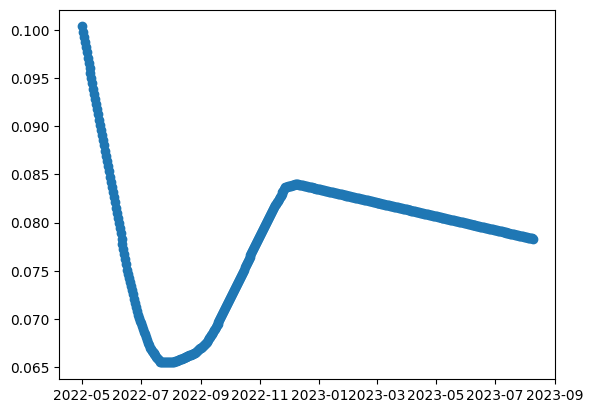

In [37]:
plt.scatter(x=forecast['ds'],y=forecast['trend'])

In [38]:
plot_plotly(m ,forecast)